In [1]:
import argparse
import mmcv
from mmdet.apis import init_detector, inference_detector, show_result, show_result_pyplot
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
CLASS_NAMES = 'U+0031 U+0032 U+0034 U+0036 U+0039 U+003F U+2000B U+20D45 U+2123D U+22999 U+22CE3 U+231C3 U+2324A U+233D0 U+23D0E U+241C6 U+242CE U+2437D U+24E30 U+24E60 U+24FA3 U+2564A U+25750 U+25877 U+25A0 U+25A1 U+25B2 U+25B3 U+25CB U+25CF U+25DA1 U+25E2E U+25EF U+25FFB U+264B3 U+266B0 U+27752 U+28263 U+29780 U+29DDA U+29E75 U+3002 U+3005 U+3006 U+3007 U+300C U+300D U+3031 U+3032 U+303B U+303D U+3042 U+3044 U+3046 U+3048 U+304A U+304B U+304C U+304D U+304E U+304F U+3050 U+3051 U+3052 U+3053 U+3054 U+3055 U+3056 U+3057 U+3058 U+3059 U+305A U+305B U+305C U+305D U+305E U+305F U+3060 U+3061 U+3062 U+3063 U+3064 U+3065 U+3066 U+3067 U+3068 U+3069 U+306A U+306B U+306C U+306D U+306E U+306F U+3070 U+3071 U+3072 U+3073 U+3074 U+3075 U+3076 U+3077 U+3078 U+3079 U+307A U+307B U+307C U+307D U+307E U+307F U+3080 U+3081 U+3082 U+3083 U+3084 U+3085 U+3086 U+3087 U+3088 U+3089 U+308A U+308B U+308C U+308D U+308F U+3090 U+3091 U+3092 U+3093 U+309D U+309E U+309F U+30A1 U+30A2 U+30A3 U+30A4 U+30A6 U+30A8 U+30AA U+30AB U+30AC U+30AD U+30AE U+30AF U+30B0 U+30B1 U+30B2 U+30B3 U+30B4 U+30B5 U+30B6 U+30B7 U+30B8 U+30B9 U+30BA U+30BB U+30BC U+30BD U+30BF U+30C0 U+30C1 U+30C2 U+30C3 U+30C4 U+30C5 U+30C6 U+30C7 U+30C8 U+30C9 U+30CA U+30CB U+30CC U+30CD U+30CE U+30CF U+30D0 U+30D1 U+30D2 U+30D3 U+30D4 U+30D5 U+30D6 U+30D7 U+30D8 U+30D9 U+30DA U+30DB U+30DC U+30DD U+30DE U+30DF U+30E0 U+30E1 U+30E2 U+30E4 U+30E6 U+30E7 U+30E8 U+30E9 U+30EA U+30EB U+30EC U+30ED U+30EF U+30F1 U+30F2 U+30F3 U+30F6 U+30FB U+30FC U+30FD U+30FE U+3280 U+3281 U+3282 U+3283 U+3284 U+3402 U+342B U+3479 U+34B5 U+34DB U+351F U+352B U+353A U+355D U+35A7 U+3634 U+3691 U+3761 U+3836 U+384C U+3863 U+38F2 U+3919 U+3AD6 U+3B87 U+3C55 U+4093 U+43E3 U+43FB U+4408 U+4453 U+4543 U+4572 U+4C61 U+4C99 U+4E00 U+4E01 U+4E03 U+4E07 U+4E08 U+4E09 U+4E0A U+4E0B U+4E0D U+4E0E U+4E11 U+4E12 U+4E14 U+4E16 U+4E17 U+4E18 U+4E19 U+4E1E U+4E21 U+4E24 U+4E26 U+4E2A U+4E2D U+4E31 U+4E32 U+4E38 U+4E39 U+4E3B U+4E3C U+4E42 U+4E43 U+4E45 U+4E4B U+4E4D U+4E4E U+4E4F U+4E57 U+4E58 U+4E59 U+4E5D U+4E5E U+4E5F U+4E71 U+4E73 U+4E7E U+4E80 U+4E82 U+4E86 U+4E88 U+4E89 U+4E8B U+4E8C U+4E8D U+4E8E U+4E91 U+4E92 U+4E94 U+4E95 U+4E98 U+4E99 U+4E9B U+4EA1 U+4EA4 U+4EA5 U+4EA6 U+4EA8 U+4EAB U+4EAC U+4EAD U+4EAE U+4EBA U+4EC0 U+4EC1 U+4EC2 U+4EC6 U+4EC7 U+4ECA U+4ECB U+4ECD U+4ECF U+4ED4 U+4ED5 U+4ED6 U+4ED7 U+4ED8 U+4ED9 U+4EDD U+4EE3 U+4EE4 U+4EE5 U+4EED U+4EEE U+4EF0 U+4EF2 U+4EF6 U+4EFB U+4F07 U+4F09 U+4F0A U+4F0D U+4F0F U+4F10 U+4F11 U+4F1A U+4F1D U+4F2F U+4F31 U+4F34 U+4F38 U+4F3A U+4F3C U+4F3D U+4F40 U+4F46 U+4F47 U+4F4D U+4F4E U+4F4F U+4F50 U+4F53 U+4F55 U+4F57 U+4F59 U+4F5B U+4F5C U+4F5E U+4F69 U+4F73 U+4F75 U+4F76 U+4F7F U+4F86 U+4F8B U+4F8D U+4F98 U+4F9B U+4F9D U+4FA0 U+4FA1 U+4FAB U+4FAD U+4FAE U+4FAF U+4FB2 U+4FBF U+4FC2 U+4FC3 U+4FC4 U+4FCA U+4FCE U+4FD7 U+4FD8 U+4FDA U+4FDD U+4FDF U+4FE0 U+4FE1 U+4FE4 U+4FEE U+4FEF U+4FF1 U+4FF3 U+4FF5 U+4FF8 U+4FFA U+5009 U+500B U+500D U+500F U+5011 U+5012 U+5016 U+5018 U+5019 U+501A U+501F U+5023 U+5024 U+5026 U+5029 U+502B U+502D U+5030 U+5036 U+5039 U+5047 U+5048 U+504F U+5055 U+5056 U+505A U+505C U+5065 U+5074 U+5076 U+5078 U+507D U+5080 U+5085 U+508D U+5091 U+5098 U+5099 U+509A U+50AC U+50AD U+50B2 U+50B3 U+50B5 U+50B7 U+50BE U+50C2 U+50C5 U+50C9 U+50CD U+50CF U+50D1 U+50D5 U+50DC U+50DE U+50E5 U+50E7 U+50EE U+50F5 U+50F9 U+50FB U+5100 U+5104 U+5109 U+5112 U+5118 U+5121 U+512A U+5132 U+5140 U+5141 U+5143 U+5144 U+5145 U+5146 U+5147 U+5148 U+5149 U+514A U+514B U+514C U+514D U+514E U+5150 U+5152 U+515A U+515C U+5165 U+5168 U+5169 U+516A U+516B U+516C U+516D U+516E U+5171 U+5175 U+5176 U+5177 U+5178 U+517C U+5185 U+5186 U+5189 U+518A U+518C U+518D U+5191 U+5199 U+519D U+51A0 U+51A4 U+51A5 U+51A8 U+51A9 U+51AC U+51B0 U+51B3 U+51B4 U+51B5 U+51B6 U+51B7 U+51C4 U+51C6 U+51C9 U+51CB U+51CC U+51CD U+51CF U+51DD U+51E0 U+51E1 U+51E2 U+51E6 U+51E7 U+51E9 U+51F0 U+51F6 U+51F9 U+51FA U+5200 U+5203 U+5204 U+5205 U+5206 U+5207 U+5208 U+520A U+520E U+5211 U+5215 U+5217 U+521D U+5224 U+5225 U+5227 U+5229 U+522A U+5230 U+5236 U+5237 U+5239 U+523A U+523B U+5243 U+5244 U+5247 U+524A U+524B U+524D U+5256 U+525B U+5263 U+5264 U+5265 U+5269 U+526A U+526F U+5270 U+5271 U+5272 U+5275 U+5284 U+5287 U+5289 U+528D U+5292 U+5294 U+529B U+529F U+52A0 U+52A3 U+52A9 U+52AA U+52AB U+52B1 U+52B4 U+52B9 U+52C3 U+52C5 U+52C7 U+52C9 U+52D5 U+52D8 U+52D9 U+52DD U+52DE U+52DF U+52E2 U+52E4 U+52E6 U+52E7 U+52F2 U+52F3 U+52F5 U+52F8 U+52FA U+52FE U+52FF U+5301 U+5302 U+5305 U+5306 U+5315 U+5316 U+5317 U+5319 U+531C U+5320 U+5323 U+5339 U+533B U+533F U+5340 U+5341 U+5343 U+5344 U+5345 U+5347 U+5348 U+534A U+5351 U+5352 U+5353 U+5354 U+5357 U+5358 U+535A U+535C U+5360 U+5365 U+5366 U+5367 U+5369 U+536F U+5370 U+5371 U+5373 U+5374 U+5375 U+5377 U+5378 U+537F U+5382 U+5384 U+5398 U+539A U+539F U+53A0 U+53A8 U+53AD U+53B3 U+53BB U+53C2 U+53C3 U+53C8 U+53C9 U+53CA U+53CB U+53CC U+53CD U+53CE U+53D4 U+53D6 U+53D7 U+53D9 U+53DB U+53DF U+53E1 U+53E2 U+53E3 U+53E4 U+53E5 U+53E9 U+53EA U+53EB U+53EC U+53EE U+53EF U+53F0 U+53F1 U+53F2 U+53F3 U+53F6 U+53F7 U+53F8 U+5401 U+5403 U+5404 U+5408 U+5409 U+540A U+540C U+540D U+540E U+540F U+5410 U+5411 U+541B U+541D U+541F U+5420 U+5426 U+542B U+542D U+542E U+5436 U+5438 U+5439 U+543B U+543C U+543E U+5440 U+5442 U+5446 U+5448 U+5449 U+544A U+5451 U+545F U+5468 U+546A U+5473 U+5475 U+547C U+547D U+5480 U+5484 U+548B U+548C U+548E U+5492 U+54A5 U+54A8 U+54AB U+54AC U+54B2 U+54B3 U+54B8 U+54BD U+54C0 U+54C1 U+54C9 U+54E1 U+54E2 U+54E5 U+54E9 U+54ED U+54EE U+54F2 U+54FD U+5504 U+5507 U+5510 U+5516 U+552F U+5531 U+553E U+5541 U+5544 U+5546 U+554C U+554F U+5553 U+5556 U+5557 U+555C U+557B U+557C U+5583 U+5584 U+5589 U+558A U+558B U+5598 U+559A U+559C U+559D U+559E U+559F U+55A7 U+55A9 U+55AA U+55AB U+55AE U+55B0 U+55B6 U+55BB U+55C5 U+55C7 U+55D4 U+55DA U+55DC U+55DF U+55E3 U+55FD U+5606 U+5608 U+5609 U+5617 U+5618 U+5629 U+562F U+5632 U+5638 U+563B U+5640 U+5642 U+564C U+564E U+5650 U+5653 U+5668 U+566A U+566B U+566C U+5672 U+5674 U+567A U+5680 U+56A2 U+56AE U+56B4 U+56BC U+56C0 U+56C1 U+56C2 U+56C3 U+56C9 U+56CA U+56D3 U+56D8 U+56DA U+56DB U+56DE U+56E0 U+56E3 U+56EC U+56F0 U+56F2 U+56F3 U+56FA U+56FD U+56FF U+5703 U+5709 U+570B U+570D U+5711 U+5712 U+5713 U+5716 U+5718 U+571F U+5721 U+5728 U+572D U+5730 U+5742 U+5747 U+574A U+574F U+5750 U+5751 U+5761 U+5764 U+5766 U+576A U+5782 U+57A2 U+57A3 U+57A8 U+57C0 U+57C3 U+57CB U+57CE U+57D2 U+57D3 U+57D4 U+57DC U+57DF U+57F5 U+57F7 U+57FA U+5800 U+5802 U+5805 U+5806 U+5815 U+5824 U+582A U+582F U+5830 U+5831 U+5834 U+5835 U+583A U+5840 U+584A U+5852 U+5854 U+5857 U+585A U+585E U+5869 U+5872 U+5875 U+5883 U+5885 U+5893 U+5897 U+589C U+58A8 U+58AE U+58BE U+58C1 U+58C7 U+58CA U+58CC U+58D1 U+58D2 U+58DC U+58DE U+58DF U+58E4 U+58EB U+58EC U+58EE U+58EF U+58F0 U+58F1 U+58F2 U+58F3 U+58F7 U+58F9 U+58FA U+58FB U+58FC U+58FD U+5900 U+5909 U+590F U+5915 U+5916 U+5919 U+591A U+591B U+591C U+5922 U+5925 U+5927 U+5929 U+592A U+592B U+592D U+592E U+592F U+5931 U+5937 U+593E U+5947 U+5948 U+5949 U+594F U+5951 U+5954 U+5955 U+595A U+5960 U+5962 U+5965 U+5967 U+596A U+596E U+5973 U+5974 U+5978 U+597D U+5982 U+5983 U+5984 U+598A U+5993 U+5996 U+5999 U+59A3 U+59A4 U+59A8 U+59AC U+59B9 U+59BB U+59BE U+59C9 U+59CA U+59CB U+59D1 U+59D2 U+59D3 U+59D4 U+59DA U+59DC U+59E5 U+59E6 U+59E8 U+59EA U+59EB U+59FB U+59FF U+5A01 U+5A0C U+5A11 U+5A18 U+5A1F U+5A23 U+5A25 U+5A2F U+5A35 U+5A36 U+5A3C U+5A46 U+5A49 U+5A55 U+5A5A U+5A62 U+5A66 U+5A6A U+5A6C U+5A7F U+5A92 U+5A9A U+5A9B U+5AB1 U+5AB3 U+5AB5 U+5ABD U+5AC1 U+5AC9 U+5ACC U+5AD7 U+5AE1 U+5AE6 U+5AE9 U+5AF0 U+5AF5 U+5B09 U+5B0B U+5B16 U+5B22 U+5B2C U+5B30 U+5B32 U+5B36 U+5B40 U+5B41 U+5B43 U+5B50 U+5B51 U+5B54 U+5B55 U+5B57 U+5B58 U+5B5C U+5B5D U+5B5F U+5B63 U+5B64 U+5B66 U+5B69 U+5B6B U+5B70 U+5B78 U+5B85 U+5B87 U+5B88 U+5B89 U+5B8B U+5B8C U+5B8D U+5B8F U+5B95 U+5B97 U+5B98 U+5B99 U+5B9A U+5B9B U+5B9C U+5B9D U+5B9F U+5BA2 U+5BA3 U+5BA4 U+5BA5 U+5BA6 U+5BAE U+5BB0 U+5BB3 U+5BB4 U+5BB5 U+5BB6 U+5BB8 U+5BB9 U+5BBF U+5BC2 U+5BC3 U+5BC4 U+5BC5 U+5BC6 U+5BC7 U+5BCC U+5BD0 U+5BD2 U+5BD3 U+5BD4 U+5BDB U+5BDD U+5BDE U+5BDF U+5BE1 U+5BE2 U+5BE4 U+5BE6 U+5BE7 U+5BE8 U+5BE9 U+5BEB U+5BEE U+5BF3 U+5BF5 U+5BF6 U+5BF8 U+5BFA U+5BFE U+5BFF U+5C01 U+5C02 U+5C04 U+5C05 U+5C06 U+5C07 U+5C08 U+5C09 U+5C0A U+5C0B U+5C0D U+5C0E U+5C0F U+5C11 U+5C13 U+5C16 U+5C1A U+5C20 U+5C22 U+5C24 U+5C28 U+5C2D U+5C31 U+5C39 U+5C3A U+5C3B U+5C3C U+5C3D U+5C3E U+5C3F U+5C40 U+5C41 U+5C45 U+5C46 U+5C48 U+5C4A U+5C4B U+5C4D U+5C4E U+5C4F U+5C50 U+5C51 U+5C53 U+5C55 U+5C5B U+5C5E U+5C60 U+5C61 U+5C62 U+5C65 U+5C69 U+5C6C U+5C6F U+5C71 U+5C8C U+5C90 U+5C91 U+5CA1 U+5CA8 U+5CA9 U+5CB1 U+5CB3 U+5CB8 U+5CD9 U+5CE0 U+5CE8 U+5CEF U+5CF0 U+5CF6 U+5CFD U+5D07 U+5D0E U+5D11 U+5D14 U+5D16 U+5D19 U+5D29 U+5D50 U+5D5C U+5D69 U+5D6F U+5D8B U+5D8C U+5DAE U+5DBA U+5DBC U+5DBD U+5DCC U+5DD6 U+5DDD U+5DDE U+5DE1 U+5DE2 U+5DE3 U+5DE5 U+5DE6 U+5DE7 U+5DE8 U+5DEB U+5DEE U+5DF1 U+5DF2 U+5DF3 U+5DF4 U+5DF5 U+5DF7 U+5DFB U+5DFE U+5E02 U+5E03 U+5E06 U+5E0B U+5E0C U+5E16 U+5E19 U+5E1B U+5E1D U+5E25 U+5E2B U+5E2D U+5E2F U+5E30 U+5E33 U+5E36 U+5E37 U+5E38 U+5E3D U+5E45 U+5E47 U+5E55 U+5E5F U+5E61 U+5E62 U+5E63 U+5E72 U+5E73 U+5E74 U+5E76 U+5E77 U+5E78 U+5E7B U+5E7C U+5E7D U+5E7E U+5E7F U+5E81 U+5E83 U+5E84 U+5E87 U+5E8A U+5E8F U+5E95 U+5E96 U+5E97 U+5E9A U+5E9C U+5EA6 U+5EA7 U+5EAB U+5EAD U+5EB5 U+5EB6 U+5EB7 U+5EB8 U+5EBB U+5EC3 U+5EC8 U+5EC9 U+5ECA U+5ED3 U+5EDF U+5EE2 U+5EE3 U+5EE9 U+5EEA U+5EF0 U+5EF1 U+5EF3 U+5EF6 U+5EF7 U+5EFA U+5EFB U+5EFC U+5EFD U+5EFE U+5EFF U+5F01 U+5F04 U+5F09 U+5F0F U+5F10 U+5F11 U+5F13 U+5F14 U+5F15 U+5F16 U+5F17 U+5F18 U+5F1F U+5F25 U+5F26 U+5F27 U+5F2F U+5F31 U+5F35 U+5F37 U+5F3A U+5F3E U+5F42 U+5F48 U+5F4A U+5F4C U+5F4E U+5F53 U+5F59 U+5F62 U+5F66 U+5F69 U+5F6B U+5F6D U+5F70 U+5F71 U+5F73 U+5F77 U+5F79 U+5F7C U+5F7F U+5F80 U+5F81 U+5F82 U+5F83 U+5F84 U+5F85 U+5F89 U+5F8A U+5F8B U+5F8C U+5F90 U+5F91 U+5F92 U+5F93 U+5F97 U+5F98 U+5F9C U+5F9E U+5FA0 U+5FA1 U+5FA4 U+5FA8 U+5FA9 U+5FAE U+5FB3 U+5FB7 U+5FB9 U+5FBD U+5FC3 U+5FC5 U+5FCC U+5FCD U+5FD7 U+5FD8 U+5FD9 U+5FDC U+5FDD U+5FE0 U+5FEB U+5FF0 U+5FF5 U+5FFD U+5FFF U+6012 U+6015 U+6016 U+6019 U+601C U+601D U+6020 U+6021 U+6025 U+6027 U+6028 U+602A U+602F U+6043 U+604B U+604D U+6050 U+6052 U+6055 U+6056 U+6059 U+605A U+605F U+6060 U+6063 U+6065 U+6068 U+6069 U+606A U+606D U+606F U+6070 U+6075 U+6089 U+608B U+608C U+608D U+6092 U+6094 U+6096 U+609F U+60A0 U+60A3 U+60A6 U+60A7 U+60A9 U+60AA U+60B2 U+60B5 U+60B6 U+60C5 U+60C6 U+60C7 U+60D1 U+60DA U+60DC U+60DF U+60E0 U+60E1 U+60E3 U+60EE U+60F0 U+60F1 U+60F3 U+60F9 U+60FA U+60FB U+6100 U+6101 U+6108 U+6109 U+610D U+610F U+6115 U+611A U+611B U+611F U+6127 U+613C U+613D U+613F U+6142 U+6144 U+6148 U+614B U+614C U+614E U+6155 U+6159 U+615A U+615D U+6162 U+6163 U+6165 U+6167 U+6168 U+616B U+616E U+6170 U+6173 U+6176 U+617E U+6182 U+6187 U+618E U+6190 U+6191 U+6196 U+619A U+61A4 U+61A9 U+61B2 U+61B6 U+61BE U+61C7 U+61C8 U+61C9 U+61D0 U+61F2 U+61F6 U+61F7 U+61F8 U+61FA U+61FC U+6200 U+6208 U+620A U+620C U+620E U+6210 U+6211 U+6212 U+6216 U+621A U+621B U+621D U+621F U+6226 U+622A U+622E U+622F U+6230 U+6232 U+6234 U+6236 U+6238 U+623B U+623E U+623F U+6240 U+6241 U+6247 U+6248 U+6249 U+624B U+624D U+6251 U+6253 U+6255 U+6258 U+625B U+6263 U+6268 U+626E U+6271 U+6276 U+6279 U+627E U+627F U+6280 U+6284 U+628A U+6291 U+6293 U+6294 U+6295 U+6297 U+6298 U+629B U+629C U+629E U+62A6 U+62AB U+62B1 U+62B5 U+62BC U+62BD U+62C2 U+62C4 U+62C5 U+62C7 U+62C9 U+62CA U+62CC U+62CD U+62D0 U+62D2 U+62D3 U+62D4 U+62D7 U+62D8 U+62D9 U+62DB U+62DC U+62DD U+62E0 U+62EC U+62ED U+62F3 U+62F5 U+62F6 U+62F7 U+62FE U+62FF U+6301 U+6307 U+6309 U+630A U+630C U+6311 U+6319 U+631F U+6328 U+632B U+632F U+633A U+633D U+633E U+633F U+6349 U+634C U+634F U+6350 U+6355 U+635C U+6367 U+6368 U+636B U+636E U+6372 U+6376 U+6377 U+637B U+6383 U+6388 U+6389 U+638C U+6392 U+6398 U+639B U+639F U+63A0 U+63A1 U+63A2 U+63A5 U+63A8 U+63A9 U+63AB U+63AC U+63B2 U+63B4 U+63BB U+63BE U+63C3 U+63C6 U+63C9 U+63CF U+63D0 U+63D2 U+63DA U+63DB U+63E1 U+63E9 U+63EE U+63F4 U+63F7 U+63FA U+640D U+640F U+6414 U+6416 U+6417 U+641C U+6426 U+643A U+6442 U+6458 U+645A U+6460 U+6467 U+6469 U+6478 U+6479 U+647A U+6483 U+6488 U+6492 U+6493 U+649E U+64A4 U+64A5 U+64AB U+64AD U+64AE U+64B0 U+64B2 U+64B9 U+64C2 U+64C7 U+64CA U+64CD U+64D2 U+64D4 U+64DA U+64E1 U+64E7 U+64EC U+64F2 U+64F4 U+6500 U+6518 U+651D U+652A U+652B U+652C U+652F U+6536 U+6537 U+6539 U+653B U+653E U+653F U+6545 U+6548 U+654E U+6551 U+6556 U+6557 U+6559 U+655D U+6562 U+6563 U+6566 U+656C U+6570 U+6572 U+6574 U+6575 U+6577 U+6578 U+6582 U+6583 U+6587 U+6589 U+658E U+6590 U+6591 U+6597 U+6599 U+659B U+659C U+659F U+65A4 U+65A7 U+65AC U+65AD U+65AF U+65B0 U+65B7 U+65B9 U+65BC U+65BD U+65C1 U+65C3 U+65C5 U+65CC U+65CF U+65D7 U+65E0 U+65E2 U+65E5 U+65E6 U+65E7 U+65E8 U+65E9 U+65EC U+65ED U+6602 U+6606 U+6607 U+660C U+660E U+660F U+6613 U+6614 U+661F U+6620 U+6625 U+6627 U+6628 U+662D U+662F U+6634 U+663C U+6642 U+6643 U+664B U+6652 U+665D U+665E U+6666 U+6668 U+6669 U+666E U+666F U+6674 U+6676 U+667A U+6681 U+6684 U+6687 U+6691 U+6696 U+6697 U+66A6 U+66AB U+66AE U+66B4 U+66B9 U+66C6 U+66C7 U+66C9 U+66D9 U+66DA U+66DC U+66DD U+66E0 U+66F0 U+66F2 U+66F3 U+66F4 U+66F8 U+66F9 U+66FC U+66FD U+66FE U+66FF U+6700 U+6703 U+6708 U+6709 U+670B U+670D U+6714 U+6715 U+6717 U+671B U+671D U+671F U+6726 U+6727 U+6728 U+672A U+672B U+672C U+672D U+672E U+6731 U+6734 U+6736 U+673A U+673D U+6749 U+674E U+674F U+6750 U+6751 U+6753 U+6756 U+6759 U+675C U+675E U+675F U+6760 U+6761 U+6762 U+6763 U+6765 U+6766 U+676D U+676F U+6771 U+6772 U+6773 U+6775 U+6777 U+677C U+677E U+677F U+6787 U+678B U+6795 U+6797 U+679A U+679C U+679D U+67A1 U+67A9 U+67AF U+67B2 U+67B4 U+67B6 U+67B7 U+67B8 U+67C4 U+67CA U+67CF U+67D0 U+67D1 U+67D3 U+67D4 U+67D8 U+67DA U+67E4 U+67E9 U+67EC U+67EF U+67F1 U+67F3 U+67F4 U+67F5 U+67F9 U+67FB U+67FE U+67FF U+6801 U+6803 U+6804 U+6816 U+6817 U+681D U+6821 U+6822 U+682A U+682B U+6832 U+6838 U+6839 U+683C U+683D U+6840 U+6841 U+6842 U+6843 U+6848 U+6850 U+6851 U+6852 U+6853 U+6854 U+685C U+685D U+685F U+6867 U+6874 U+6876 U+687E U+687F U+6881 U+6885 U+6893 U+6894 U+6897 U+689D U+689F U+68A2 U+68A6 U+68A7 U+68A8 U+68AD U+68AF U+68B0 U+68B3 U+68B5 U+68B6 U+68BA U+68BC U+68C4 U+68C9 U+68CA U+68CD U+68D0 U+68D2 U+68D7 U+68D8 U+68DA U+68DF U+68E0 U+68E7 U+68EE U+68F2 U+68F9 U+68FA U+6900 U+6905 U+690B U+690D U+690E U+6912 U+6919 U+691C U+6939 U+693D U+693F U+6942 U+694A U+6951 U+6953 U+6959 U+695A U+695C U+695D U+6960 U+6961 U+696A U+696B U+696D U+696F U+6974 U+6975 U+697C U+697D U+6982 U+698A U+698E U+6991 U+6995 U+699B U+69A7 U+69AA U+69AE U+69B4 U+69BE U+69BF U+69C1 U+69C3 U+69C7 U+69CB U+69CC U+69CD U+69CE U+69D6 U+69D7 U+69D8 U+69D9 U+69DB U+69E9 U+69EA U+69EB U+69F3 U+69F9 U+69FF U+6A02 U+6A0A U+6A0B U+6A12 U+6A13 U+6A14 U+6A19 U+6A1F U+6A21 U+6A23 U+6A29 U+6A2A U+6A39 U+6A3A U+6A3D U+6A47 U+6A4B U+6A58 U+6A59 U+6A5F U+6A61 U+6A66 U+6A80 U+6A8B U+6A8D U+6A8E U+6A90 U+6A97 U+6A9C U+6AA2 U+6ABB U+6AC2 U+6AC3 U+6AD3 U+6ADA U+6ADB U+6AE8 U+6AFA U+6AFB U+6B0A U+6B1D U+6B20 U+6B21 U+6B23 U+6B27 U+6B2C U+6B32 U+6B3A U+6B3D U+6B3E U+6B47 U+6B4C U+6B4E U+6B53 U+6B5B U+6B5F U+6B61 U+6B62 U+6B63 U+6B64 U+6B66 U+6B69 U+6B6F U+6B73 U+6B74 U+6B78 U+6B79 U+6B7B U+6B86 U+6B8A U+6B8B U+6B96 U+6B98 U+6B9E U+6BAF U+6BB5 U+6BB7 U+6BBA U+6BBB U+6BBC U+6BBD U+6BBF U+6BC0 U+6BC6 U+6BCB U+6BCD U+6BCE U+6BD2 U+6BD4 U+6BD8 U+6BDB U+6BDF U+6BEB U+6BEC U+6BEF U+6C08 U+6C0A U+6C0F U+6C11 U+6C17 U+6C23 U+6C34 U+6C37 U+6C38 U+6C40 U+6C41 U+6C42 U+6C50 U+6C57 U+6C5A U+6C5D U+6C5F U+6C60 U+6C70 U+6C72 U+6C76 U+6C7A U+6C7E U+6C83 U+6C88 U+6C90 U+6C92 U+6C93 U+6C96 U+6C99 U+6CA1 U+6CA2 U+6CAB U+6CB3 U+6CB8 U+6CB9 U+6CBB U+6CBC U+6CBD U+6CBF U+6CC1 U+6CC4 U+6CC5 U+6CC9 U+6CCA U+6CD4 U+6CD5 U+6CDD U+6CE1 U+6CE2 U+6CE3 U+6CE5 U+6CE8 U+6CEA U+6CF0 U+6CF3 U+6CFB U+6D0B U+6D12 U+6D17 U+6D1B U+6D1E U+6D25 U+6D29 U+6D2A U+6D32 U+6D3B U+6D3E U+6D41 U+6D44 U+6D45 U+6D5A U+6D5C U+6D65 U+6D66 U+6D69 U+6D6A U+6D6E U+6D74 U+6D77 U+6D78 U+6D85 U+6D88 U+6D8C U+6D8E U+6D95 U+6D99 U+6DAF U+6DB2 U+6DB8 U+6DBC U+6DBF U+6DC0 U+6DCB U+6DDA U+6DE1 U+6DE8 U+6DEA U+6DEB U+6DF1 U+6DF3 U+6DF5 U+6DF7 U+6DF9 U+6DFA U+6DFB U+6E05 U+6E07 U+6E08 U+6E09 U+6E0A U+6E0B U+6E13 U+6E15 U+6E1A U+6E1B U+6E1F U+6E20 U+6E21 U+6E23 U+6E24 U+6E26 U+6E29 U+6E2C U+6E2D U+6E2F U+6E38 U+6E3A U+6E3E U+6E4A U+6E56 U+6E5B U+6E67 U+6E6F U+6E7E U+6E7F U+6E80 U+6E8F U+6E90 U+6E99 U+6E9C U+6E9D U+6EA2 U+6EAA U+6EAB U+6EBA U+6EC4 U+6EC5 U+6ECB U+6ED1 U+6ED3 U+6EDD U+6EDE U+6EF4 U+6EF8 U+6EFF U+6F01 U+6F02 U+6F06 U+6F09 U+6F0F U+6F14 U+6F15 U+6F20 U+6F22 U+6F23 U+6F2B U+6F2C U+6F32 U+6F38 U+6F3B U+6F3F U+6F45 U+6F51 U+6F54 U+6F5B U+6F5C U+6F5F U+6F64 U+6F66 U+6F6E U+6F6F U+6F70 U+6F78 U+6F81 U+6F84 U+6FA1 U+6FA4 U+6FB3 U+6FC0 U+6FC1 U+6FC2 U+6FC3 U+6FD5 U+6FDF U+6FE1 U+6FE4 U+6FEB U+6FEF U+6FF1 U+6FF5 U+7009 U+7011 U+7027 U+702C U+7030 U+704C U+7058 U+706B U+706F U+7070 U+7075 U+7078 U+707D U+7089 U+708A U+708E U+7092 U+7099 U+70AC U+70AD U+70AE U+70B3 U+70B7 U+70B9 U+70BA U+70C8 U+70CF U+70D9 U+70DF U+70EE U+70F9 U+7109 U+7114 U+7119 U+711A U+7121 U+7126 U+7136 U+713C U+7146 U+7149 U+714E U+7151 U+7156 U+7159 U+7164 U+7165 U+7167 U+7169 U+716C U+716E U+717B U+717D U+7187 U+718A U+719F U+71A8 U+71AC U+71B1 U+71BE U+71C3 U+71C8 U+71D2 U+71D5 U+71D7 U+71DF U+71E0 U+71E5 U+71E7 U+71ED U+71F5 U+71FC U+71FF U+7208 U+7210 U+721B U+7228 U+722A U+722C U+722D U+7230 U+7232 U+7235 U+7236 U+7239 U+723A U+723C U+723D U+723E U+7240 U+7246 U+7247 U+7248 U+724C U+7252 U+7259 U+725B U+725D U+7261 U+7262 U+7267 U+7269 U+7279 U+727D U+7280 U+7287 U+72A0 U+72A2 U+72AC U+72AF U+72B6 U+72C2 U+72C4 U+72CE U+72D0 U+72D7 U+72D9 U+72DB U+72E9 U+72EC U+72ED U+72F0 U+72F7 U+72F8 U+72F9 U+72FB U+72FC U+72FD U+731B U+731C U+731F U+7325 U+7328 U+7329 U+732A U+732B U+732E U+7334 U+7336 U+733F U+7344 U+7345 U+734F U+7363 U+7368 U+736C U+7370 U+7372 U+7375 U+7378 U+737A U+737B U+7384 U+7387 U+7389 U+738B U+7396 U+73A9 U+73B2 U+73CA U+73CD U+73CE U+73E0 U+73EA U+73ED U+73FE U+7403 U+7406 U+7409 U+7422 U+742B U+7433 U+7434 U+7435 U+7436 U+7455 U+7459 U+745A U+745E U+7460 U+7463 U+746A U+7483 U+74A7 U+74B0 U+74BD U+74CA U+74CF U+74DC U+74E0 U+74E2 U+74E6 U+74EE U+74F6 U+7500 U+750D U+7511 U+7515 U+7518 U+751A U+751C U+751E U+751F U+7523 U+7525 U+7528 U+752B U+7530 U+7531 U+7532 U+7533 U+7537 U+753A U+753B U+7544 U+754A U+754B U+754C U+754F U+7551 U+7552 U+7554 U+7559 U+755A U+755C U+755D U+7560 U+7562 U+7565 U+7566 U+7567 U+756A U+756B U+7570 U+7573 U+7576 U+7577 U+7578 U+757E U+757F U+7582 U+7587 U+758A U+758B U+758E U+7591 U+759D U+75A3 U+75AB U+75B1 U+75B2 U+75B3 U+75B5 U+75B9 U+75BE U+75C5 U+75C7 U+75CD U+75D2 U+75D5 U+75D8 U+75DB U+75DE U+75E2 U+75E3 U+75E4 U+75E9 U+75F0 U+75F4 U+75FF U+7616 U+761E U+761F U+7621 U+7624 U+7627 U+7630 U+7642 U+7647 U+7648 U+7652 U+7656 U+7661 U+7669 U+766A U+7678 U+767A U+767B U+767C U+767D U+767E U+7682 U+7683 U+7684 U+7686 U+7687 U+7688 U+76AE U+76B7 U+76B9 U+76BA U+76BF U+76C2 U+76C3 U+76C6 U+76C8 U+76CA U+76D2 U+76D6 U+76D7 U+76DB U+76DC U+76DE U+76DF U+76E1 U+76E3 U+76E4 U+76E5 U+76E7 U+76EE U+76F2 U+76F4 U+76F8 U+76FE U+7701 U+7707 U+7709 U+770B U+770C U+771B U+771E U+771F U+7720 U+7724 U+7726 U+7729 U+7737 U+7738 U+773A U+773C U+7740 U+775A U+775C U+7761 U+7762 U+7763 U+7766 U+7768 U+776A U+777E U+778B U+77AA U+77AC U+77B3 U+77BB U+77BC U+77BF U+77DA U+77DB U+77E2 U+77E3 U+77E5 U+77E9 U+77ED U+77F3 U+7802 U+780C U+780D U+7814 U+7815 U+7825 U+7827 U+7832 U+7834 U+783A U+786B U+786F U+7881 U+788C U+788E U+7891 U+7893 U+7897 U+78A7 U+78BA U+78C1 U+78D0 U+78E4 U+78E8 U+78EF U+78FD U+7912 U+7919 U+792B U+792C U+793A U+793C U+793E U+7940 U+7947 U+7948 U+7950 U+7953 U+7955 U+7956 U+7957 U+795A U+795D U+795E U+795F U+7960 U+7962 U+7965 U+796D U+7977 U+797F U+7980 U+7981 U+7984 U+7985 U+798A U+798D U+798F U+79A6 U+79AA U+79AE U+79B0 U+79B1 U+79B9 U+79BB U+79BD U+79BF U+79C0 U+79C1 U+79C9 U+79CB U+79D1 U+79D8 U+79DF U+79E1 U+79E3 U+79E4 U+79E6 U+79E7 U+79E9 U+79EC U+79F0 U+79FB U+7A00 U+7A0B U+7A0D U+7A0E U+7A14 U+7A17 U+7A1A U+7A1C U+7A20 U+7A2E U+7A31 U+7A32 U+7A37 U+7A3B U+7A3C U+7A3D U+7A3E U+7A3F U+7A40 U+7A42 U+7A49 U+7A4D U+7A4F U+7A57 U+7A62 U+7A6A U+7A74 U+7A76 U+7A79 U+7A7A U+7A7F U+7A81 U+7A82 U+7A83 U+7A88 U+7A93 U+7A95 U+7A97 U+7A9F U+7AA9 U+7AAA U+7AAE U+7AB6 U+7AB9 U+7ABA U+7ABB U+7AC3 U+7AC4 U+7AC5 U+7AC8 U+7ACA U+7ACB U+7AD2 U+7ADC U+7ADD U+7ADF U+7AE0 U+7AE5 U+7AEA U+7AED U+7AEF U+7AF6 U+7AF9 U+7AFA U+7AFF U+7B04 U+7B06 U+7B0A U+7B0B U+7B0F U+7B11 U+7B18 U+7B19 U+7B1B U+7B1E U+7B20 U+7B25 U+7B26 U+7B27 U+7B2C U+7B39 U+7B46 U+7B48 U+7B49 U+7B4B U+7B4C U+7B4D U+7B4E U+7B4F U+7B50 U+7B51 U+7B52 U+7B54 U+7B56 U+7B65 U+7B67 U+7B6C U+7B6D U+7B6E U+7B72 U+7B75 U+7B86 U+7B87 U+7B8F U+7B92 U+7B94 U+7B95 U+7B97 U+7B99 U+7BA1 U+7BAA U+7BAD U+7BB1 U+7BB4 U+7BB8 U+7BC0 U+7BC4 U+7BC6 U+7BC7 U+7BC9 U+7BD7 U+7BE0 U+7BE4 U+7BE6 U+7BE9 U+7BED U+7BF7 U+7BFC U+7C00 U+7C0D U+7C11 U+7C12 U+7C13 U+7C14 U+7C17 U+7C1F U+7C21 U+7C2A U+7C3E U+7C3F U+7C43 U+7C46 U+7C4D U+7C4F U+7C54 U+7C5F U+7C60 U+7C69 U+7C6C U+7C73 U+7C7E U+7C82 U+7C83 U+7C89 U+7C8B U+7C92 U+7C94 U+7C95 U+7C97 U+7C98 U+7C9F U+7CA4 U+7CA5 U+7CA7 U+7CAE U+7CB2 U+7CB3 U+7CB9 U+7CBD U+7CBE U+7CC0 U+7CC4 U+7CCA U+7CD2 U+7CD5 U+7CD6 U+7CDC U+7CDD U+7CDE U+7CDF U+7CE0 U+7CE7 U+7CEB U+7CEF U+7CF6 U+7CF8 U+7CFA U+7CFB U+7D00 U+7D02 U+7D04 U+7D05 U+7D0A U+7D0B U+7D0D U+7D10 U+7D14 U+7D17 U+7D19 U+7D1A U+7D1B U+7D20 U+7D21 U+7D22 U+7D2B U+7D2C U+7D2F U+7D30 U+7D35 U+7D39 U+7D3A U+7D42 U+7D43 U+7D44 U+7D45 U+7D46 U+7D4C U+7D50 U+7D5E U+7D66 U+7D68 U+7D6E U+7D71 U+7D72 U+7D75 U+7D76 U+7D79 U+7D93 U+7D99 U+7D9A U+7DA2 U+7DAD U+7DB1 U+7DB2 U+7DB4 U+7DB8 U+7DBA U+7DBB U+7DBD U+7DBE U+7DBF U+7DC7 U+7DCA U+7DCB U+7DCF U+7DD1 U+7DD2 U+7DDA U+7DE0 U+7DE1 U+7DE8 U+7DE9 U+7DEC U+7DF4 U+7DFB U+7E01 U+7E04 U+7E0A U+7E11 U+7E1B U+7E1E U+7E21 U+7E22 U+7E23 U+7E26 U+7E27 U+7E2B U+7E2E U+7E35 U+7E37 U+7E3A U+7E3B U+7E3D U+7E3E U+7E41 U+7E45 U+7E46 U+7E4A U+7E4B U+7E4D U+7E54 U+7E55 U+7E5E U+7E61 U+7E69 U+7E6A U+7E6D U+7E70 U+7E7B U+7E7C U+7E7E U+7E8C U+7E8F U+7E92 U+7E94 U+7E9C U+7F3A U+7F4C U+7F54 U+7F5F U+7F60 U+7F6A U+7F6E U+7F70 U+7F75 U+7F77 U+7F78 U+7F79 U+7F85 U+7F88 U+7F8A U+7F8E U+7F94 U+7F99 U+7F9A U+7F9E U+7FA3 U+7FA4 U+7FA8 U+7FA9 U+7FAE U+7FB2 U+7FB9 U+7FBD U+7FC1 U+7FC5 U+7FCC U+7FD2 U+7FD4 U+7FE0 U+7FE1 U+7FEB U+7FF0 U+7FF3 U+7FFA U+7FFB U+7FFC U+8000 U+8001 U+8003 U+8004 U+8005 U+8006 U+800C U+8010 U+8012 U+8015 U+8017 U+8018 U+8026 U+8033 U+8036 U+803B U+803D U+804A U+8056 U+8058 U+805A U+805E U+805F U+8061 U+8062 U+8072 U+8073 U+8074 U+8077 U+807D U+8086 U+8087 U+8089 U+808C U+8096 U+8098 U+809A U+809D U+80A1 U+80A2 U+80A5 U+80A9 U+80AF U+80B1 U+80B2 U+80B4 U+80C3 U+80C6 U+80CC U+80CE U+80DD U+80DE U+80E1 U+80E4 U+80ED U+80EF U+80F4 U+80F7 U+80F8 U+80FC U+80FD U+8102 U+8106 U+8107 U+8108 U+8109 U+810A U+8114 U+811A U+811B U+8123 U+8129 U+812F U+8131 U+8133 U+813E U+814B U+814E U+8150 U+8155 U+8165 U+8166 U+8168 U+816B U+816E U+8170 U+8178 U+8179 U+817F U+8182 U+8188 U+818F U+819A U+819D U+81A0 U+81B3 U+81BD U+81BE U+81C2 U+81C6 U+81C8 U+81C9 U+81CD U+81D1 U+81D3 U+81D8 U+81D9 U+81DA U+81DF U+81E3 U+81E5 U+81E8 U+81EA U+81ED U+81F3 U+81F4 U+81FA U+81FB U+81FC U+8201 U+8202 U+8205 U+8207 U+8208 U+820A U+820C U+820D U+820E U+8210 U+8212 U+8216 U+8217 U+8218 U+821B U+821C U+821E U+821F U+8229 U+822A U+822C U+8235 U+8236 U+8239 U+8258 U+825A U+8261 U+826A U+826B U+826E U+826F U+8271 U+8272 U+8276 U+8277 U+8278 U+827E U+828B U+828D U+8292 U+8299 U+829D U+829F U+82A1 U+82A5 U+82A6 U+82AC U+82AD U+82B1 U+82B3 U+82B8 U+82B9 U+82BD U+82C5 U+82D1 U+82D3 U+82D4 U+82D7 U+82DB U+82DE U+82DF U+82E1 U+82E3 U+82E5 U+82E6 U+82E7 U+82EA U+82EB U+82F1 U+82F5 U+82FA U+82FB U+8302 U+8303 U+8304 U+8305 U+830E U+8317 U+8318 U+831C U+8328 U+832B U+8331 U+8332 U+8334 U+8336 U+8338 U+8339 U+833C U+8345 U+8347 U+8349 U+834A U+8352 U+8358 U+8377 U+837B U+837C U+8385 U+838A U+838E U+8395 U+8396 U+839A U+839E U+839F U+83A7 U+83A8 U+83AB U+83B1 U+83B5 U+83BD U+83BE U+83C1 U+83C5 U+83CA U+83CC U+83D3 U+83D4 U+83D6 U+83D8 U+83DC U+83DD U+83DF U+83E9 U+83EA U+83EB U+83EF U+83F0 U+83F1 U+83F4 U+83FD U+8404 U+8406 U+840A U+840C U+840D U+8413 U+8420 U+8429 U+842C U+8431 U+8438 U+843C U+843D U+8449 U+844D U+844E U+8457 U+845B U+845C U+8461 U+8462 U+8463 U+8466 U+8469 U+846C U+846D U+8471 U+8475 U+8476 U+847A U+8490 U+8494 U+8499 U+849C U+849F U+84A1 U+84B2 U+84B8 U+84BB U+84BC U+84BF U+84C9 U+84CB U+84CD U+84D9 U+84EC U+84EE U+84F4 U+84FC U+8500 U+8511 U+8513 U+8514 U+8515 U+8518 U+851E U+8521 U+8526 U+852C U+852D U+8535 U+853D U+8540 U+8543 U+8549 U+854A U+854E U+8557 U+8562 U+8563 U+8568 U+8569 U+856A U+856D U+8577 U+857A U+857E U+8581 U+8584 U+858A U+858F U+8591 U+8594 U+8597 U+8599 U+859C U+85A6 U+85A8 U+85A9 U+85AA U+85AB U+85AC U+85AE U+85AF U+85B7 U+85B9 U+85BA U+85C1 U+85C9 U+85CD U+85CF U+85D0 U+85DC U+85DD U+85E4 U+85E5 U+85E9 U+85EA U+85F7 U+85FA U+85FB U+85FF U+8602 U+8607 U+860B U+8613 U+8618 U+8621 U+8629 U+862D U+8630 U+863C U+863F U+864E U+8650 U+8655 U+8657 U+865A U+865E U+865F U+8667 U+866B U+866C U+866F U+8671 U+8675 U+8679 U+867B U+868A U+8693 U+8695 U+86A2 U+86A3 U+86A4 U+86A9 U+86AB U+86AF U+86B0 U+86B6 U+86B8 U+86BA U+86C1 U+86C4 U+86C7 U+86C9 U+86CD U+86CE U+86D5 U+86D9 U+86DB U+86DE U+86DF U+86E4 U+86E5 U+86ED U+86EE U+86EF U+86F8 U+86F9 U+86FE U+8700 U+8702 U+8703 U+8706 U+8708 U+870A U+870B U+870D U+8710 U+8711 U+8712 U+8718 U+871C U+8725 U+8729 U+8734 U+8737 U+873B U+873E U+873F U+8749 U+874B U+874E U+8753 U+8755 U+8757 U+8759 U+8760 U+8764 U+8766 U+876E U+8774 U+8776 U+8778 U+877F U+8782 U+8787 U+8789 U+878D U+8796 U+87A2 U+87AB U+87BA U+87BB U+87C0 U+87C4 U+87C6 U+87C7 U+87CB U+87D2 U+87DB U+87DF U+87E0 U+87EC U+87F2 U+87F6 U+87F7 U+87F9 U+87FB U+87FE U+8803 U+8805 U+880E U+8815 U+881C U+8821 U+8822 U+882E U+8831 U+8836 U+883B U+8840 U+8846 U+884C U+8852 U+8853 U+8857 U+885B U+885D U+885E U+8861 U+8862 U+8863 U+8868 U+8870 U+8872 U+887D U+887E U+887F U+8881 U+8882 U+8888 U+888B U+888D U+8892 U+8896 U+889E U+88A2 U+88AB U+88B1 U+88B4 U+88B7 U+88BF U+88C1 U+88C2 U+88C5 U+88CF U+88D2 U+88D4 U+88D5 U+88D8 U+88D9 U+88DC U+88DD U+88DF U+88E1 U+88F3 U+88F8 U+88F9 U+88FD U+88FE U+8901 U+8904 U+890A U+890C U+8910 U+8912 U+8913 U+8925 U+8938 U+8941 U+8944 U+894C U+8956 U+895F U+8960 U+8972 U+8974 U+8977 U+897F U+8981 U+8986 U+8987 U+898B U+898F U+8996 U+8997 U+899A U+89A7 U+89AA U+89B3 U+89BA U+89BD U+89BF U+89C0 U+89D2 U+89DC U+89E3 U+89E6 U+89E7 U+89F4 U+89F8 U+8A00 U+8A02 U+8A08 U+8A0E U+8A13 U+8A17 U+8A18 U+8A1B U+8A1D U+8A1F U+8A23 U+8A25 U+8A2A U+8A2D U+8A31 U+8A33 U+8A34 U+8A3B U+8A3C U+8A48 U+8A50 U+8A54 U+8A55 U+8A5B U+8A5E U+8A60 U+8A63 U+8A66 U+8A69 U+8A6B U+8A6E U+8A70 U+8A71 U+8A73 U+8A75 U+8A82 U+8A85 U+8A87 U+8A89 U+8A8C U+8A8D U+8A91 U+8A93 U+8A95 U+8A98 U+8A9E U+8AA0 U+8AA1 U+8AA4 U+8AA5 U+8AA6 U+8AA8 U+8AAC U+8AAD U+8AB0 U+8AB2 U+8AB9 U+8ABC U+8ABF U+8AC7 U+8ACB U+8ACC U+8ACD U+8ACF U+8AD6 U+8ADA U+8ADB U+8ADC U+8AE2 U+8AE6 U+8AE7 U+8AEB U+8AED U+8AF1 U+8AF7 U+8AF8 U+8AFA U+8AFE U+8B00 U+8B01 U+8B02 U+8B0C U+8B0E U+8B10 U+8B17 U+8B19 U+8B1B U+8B1D U+8B20 U+8B21 U+8B28 U+8B2B U+8B2C U+8B39 U+8B49 U+8B4F U+8B58 U+8B5A U+8B5C U+8B6C U+8B70 U+8B72 U+8B77 U+8B7D U+8B80 U+8B83 U+8B8A U+8B90 U+8B92 U+8B93 U+8B9A U+8C37 U+8C3A U+8C3F U+8C46 U+8C48 U+8C49 U+8C4A U+8C4C U+8C50 U+8C55 U+8C5A U+8C61 U+8C62 U+8C6A U+8C6B U+8C7A U+8C8A U+8C8C U+8C9D U+8C9E U+8C9F U+8CA0 U+8CA1 U+8CA2 U+8CA7 U+8CA8 U+8CA9 U+8CAA U+8CAB U+8CAC U+8CAE U+8CAF U+8CB0 U+8CB3 U+8CB4 U+8CB6 U+8CB7 U+8CB8 U+8CBB U+8CBC U+8CBF U+8CC0 U+8CC2 U+8CC3 U+8CC4 U+8CC7 U+8CC8 U+8CCA U+8CCE U+8CD1 U+8CD3 U+8CD4 U+8CDB U+8CDC U+8CDE U+8CE0 U+8CE2 U+8CE3 U+8CE4 U+8CE6 U+8CEA U+8CED U+8CFA U+8CFD U+8D04 U+8D05 U+8D08 U+8D0B U+8D0F U+8D14 U+8D16 U+8D64 U+8D66 U+8D67 U+8D6B U+8D70 U+8D74 U+8D77 U+8D81 U+8D85 U+8D8A U+8D99 U+8DA3 U+8DB3 U+8DBE U+8DCB U+8DCC U+8DCF U+8DD6 U+8DDD U+8DDF U+8DE1 U+8DE8 U+8DEA U+8DEF U+8DF3 U+8DFC U+8E06 U+8E08 U+8E0A U+8E0F U+8E1D U+8E1E U+8E2A U+8E30 U+8E44 U+8E47 U+8E48 U+8E49 U+8E4A U+8E5F U+8E64 U+8E72 U+8E74 U+8E81 U+8E87 U+8E8A U+8E8D U+8EA1 U+8EAB U+8EAC U+8EAF U+8EB0 U+8EB1 U+8EBE U+8EC0 U+8EC6 U+8EC8 U+8ECA U+8ECD U+8ED2 U+8EE2 U+8EF0 U+8EF8 U+8EFD U+8F03 U+8F09 U+8F12 U+8F14 U+8F15 U+8F19 U+8F1B U+8F1D U+8F29 U+8F2A U+8F2F U+8F3E U+8F3F U+8F46 U+8F49 U+8F4D U+8F4E U+8F5F U+8F61 U+8F64 U+8F9B U+8F9C U+8F9E U+8F9F U+8FA4 U+8FA8 U+8FAD U+8FAF U+8FB0 U+8FB1 U+8FB2 U+8FB7 U+8FBA U+8FBB U+8FBC U+8FC2 U+8FC4 U+8FCE U+8FD1 U+8FD4 U+8FDA U+8FE6 U+8FE9 U+8FEB U+8FED U+8FEF U+8FF0 U+8FF7 U+8FF9 U+8FFA U+8FFD U+9000 U+9001 U+9003 U+9005 U+9006 U+9008 U+900D U+900F U+9010 U+9013 U+9014 U+9017 U+9019 U+901A U+901D U+901E U+901F U+9020 U+9022 U+9023 U+9030 U+9032 U+9038 U+903C U+9041 U+9042 U+9045 U+9047 U+904A U+904B U+904D U+904E U+9051 U+9053 U+9054 U+9055 U+9056 U+9059 U+9060 U+9063 U+9065 U+9069 U+906D U+906E U+9072 U+9075 U+9076 U+9077 U+9078 U+907A U+907D U+907F U+9082 U+9084 U+9088 U+9089 U+908A U+9091 U+90A3 U+90A6 U+90A8 U+90AA U+90AF U+90C1 U+90CA U+90CE U+90DB U+90E1 U+90E8 U+90ED U+90F7 U+90FD U+9115 U+9119 U+912D U+9130 U+9132 U+9149 U+914C U+914D U+914E U+9152 U+9154 U+9156 U+9162 U+9169 U+916C U+9174 U+9177 U+9178 U+9189 U+918D U+9190 U+9192 U+919C U+91A2 U+91A4 U+91AA U+91AB U+91AC U+91AD U+91AF U+91B4 U+91B8 U+91BC U+91BF U+91C0 U+91C4 U+91C7 U+91C8 U+91CB U+91CC U+91CD U+91CE U+91CF U+91D1 U+91D8 U+91DC U+91DD U+91E1 U+91E3 U+91E7 U+91F5 U+91FF U+9206 U+920D U+920E U+9214 U+922C U+9234 U+9237 U+9244 U+924B U+925B U+9262 U+9264 U+9266 U+927E U+9280 U+9283 U+9285 U+9295 U+9298 U+929A U+929C U+92AD U+92D2 U+92E4 U+92EA U+92ED U+92F2 U+92F3 U+92F8 U+9304 U+9306 U+9310 U+9320 U+9322 U+9326 U+932B U+932C U+932F U+9332 U+934B U+9354 U+935B U+936B U+936C U+936E U+937C U+937E U+938C U+9394 U+9396 U+9397 U+939A U+93A7 U+93AD U+93AE U+93B0 U+93C3 U+93CA U+93D0 U+93D1 U+93E1 U+93E4 U+93E5 U+9403 U+9410 U+9418 U+9419 U+942B U+9435 U+9444 U+9451 U+9453 U+945B U+9470 U+9475 U+947D U+947F U+9577 U+9580 U+9583 U+9589 U+958B U+958F U+9591 U+9592 U+9593 U+9594 U+9599 U+95A2 U+95A3 U+95A4 U+95A7 U+95A8 U+95B2 U+95BB U+95BC U+95C7 U+95CA U+95CC U+95CD U+95D5 U+95D6 U+95DC U+95E2 U+961C U+961D U+962A U+9632 U+963B U+963F U+9640 U+9644 U+964B U+964C U+964D U+9650 U+9662 U+9663 U+9664 U+9665 U+966A U+9670 U+9673 U+9675 U+9676 U+9677 U+9678 U+967A U+967D U+9682 U+9685 U+9686 U+9688 U+968A U+968B U+968E U+968F U+9694 U+9698 U+9699 U+969B U+969C U+96A0 U+96A3 U+96A8 U+96AA U+96B1 U+96B7 U+96BA U+96BB U+96BC U+96C0 U+96C1 U+96C4 U+96C5 U+96C6 U+96C7 U+96C9 U+96CB U+96CC U+96CE U+96D1 U+96D5 U+96D6 U+96D9 U+96DB U+96DC U+96DE U+96E2 U+96E3 U+96E8 U+96EA U+96EB U+96F2 U+96F6 U+96F7 U+96F9 U+96FB U+9700 U+9704 U+9707 U+970A U+970E U+970F U+9716 U+971C U+971E U+9724 U+9727 U+9730 U+9732 U+9739 U+973D U+9742 U+9748 U+974D U+9752 U+9756 U+9759 U+975C U+975E U+9761 U+9762 U+9763 U+9768 U+9769 U+976A U+976D U+9771 U+977C U+9781 U+9785 U+9786 U+978B U+978D U+9798 U+97A0 U+97AD U+97C3 U+97D3 U+97ED U+97EE U+97F3 U+97FB U+97FF U+9801 U+9802 U+9803 U+9805 U+9806 U+9808 U+980A U+980C U+9810 U+9811 U+9813 U+9817 U+9818 U+9821 U+9825 U+982C U+982D U+9830 U+9834 U+9837 U+9838 U+983B U+983C U+983D U+9846 U+984B U+984C U+984D U+984F U+9854 U+9855 U+9858 U+9859 U+985A U+985B U+985E U+9867 U+986F U+9870 U+9871 U+98A8 U+98AA U+98AD U+98AF U+98C4 U+98DB U+98DC U+98DF U+98E2 U+98E9 U+98EE U+98EF U+98F2 U+98F4 U+98FC U+98FD U+98FE U+9903 U+9905 U+9909 U+990A U+990C U+9910 U+9913 U+9918 U+991D U+9921 U+9928 U+992C U+992E U+9932 U+9939 U+993B U+9940 U+9942 U+9945 U+9949 U+994B U+9951 U+9952 U+9955 U+9957 U+9958 U+9996 U+9999 U+99A8 U+99AC U+99AD U+99B3 U+99B4 U+99C4 U+99C5 U+99C6 U+99C8 U+99D0 U+99D1 U+99D2 U+99D5 U+99DD U+99DF U+99ED U+99FF U+9A0E U+9A12 U+9A13 U+9A19 U+9A28 U+9A2B U+9A30 U+9A37 U+9A40 U+9A43 U+9A45 U+9A4D U+9A55 U+9A57 U+9A5A U+9A5B U+9A62 U+9A65 U+9A69 U+9A6A U+9A6B U+9AA8 U+9AB8 U+9AC4 U+9AD3 U+9AD4 U+9AD8 U+9AD9 U+9AE6 U+9AE9 U+9AEA U+9AEB U+9AED U+9AEE U+9AEF U+9AF1 U+9AF7 U+9AFB U+9B0C U+9B12 U+9B18 U+9B1A U+9B1B U+9B1F U+9B22 U+9B23 U+9B27 U+9B28 U+9B29 U+9B2A U+9B2E U+9B31 U+9B3B U+9B3C U+9B41 U+9B42 U+9B44 U+9B45 U+9B4F U+9B51 U+9B54 U+9B58 U+9B5A U+9B5F U+9B66 U+9B6F U+9B73 U+9B7C U+9B85 U+9B87 U+9B8E U+9B91 U+9B92 U+9B93 U+9B97 U+9B9F U+9BA0 U+9BA5 U+9BA6 U+9BA7 U+9BA8 U+9BAA U+9BAB U+9BAC U+9BAD U+9BAE U+9BB2 U+9BB9 U+9BC9 U+9BCA U+9BCE U+9BD1 U+9BD2 U+9BD4 U+9BD6 U+9BDB U+9BE8 U+9BEF U+9BF0 U+9BF1 U+9BF2 U+9BF5 U+9BF7 U+9C06 U+9C08 U+9C0A U+9C0C U+9C10 U+9C12 U+9C14 U+9C15 U+9C1B U+9C23 U+9C24 U+9C25 U+9C29 U+9C2D U+9C2F U+9C32 U+9C36 U+9C39 U+9C3A U+9C3B U+9C3E U+9C41 U+9C45 U+9C46 U+9C47 U+9C48 U+9C4A U+9C4F U+9C52 U+9C57 U+9C5A U+9C5D U+9C60 U+9C63 U+9C67 U+9C6A U+9C6E U+9C72 U+9C76 U+9C78 U+9C7A U+9CE5 U+9CE7 U+9CE9 U+9CEB U+9CF0 U+9CF3 U+9CF4 U+9CF6 U+9CFD U+9D03 U+9D06 U+9D08 U+9D12 U+9D1E U+9D28 U+9D2B U+9D2C U+9D3B U+9D3D U+9D3F U+9D46 U+9D49 U+9D50 U+9D51 U+9D59 U+9D5C U+9D5D U+9D5E U+9D72 U+9D7A U+9D86 U+9D89 U+9D8D U+9D8F U+9D9A U+9DAB U+9DAF U+9DB4 U+9DBA U+9DC2 U+9DC3 U+9DC4 U+9DC9 U+9DD7 U+9DE6 U+9DEF U+9DF2 U+9DF9 U+9DFA U+9E0A U+9E1B U+9E1E U+9E75 U+9E7D U+9E7F U+9E81 U+9E88 U+9E8B U+9E8C U+9E92 U+9E93 U+9E95 U+9E97 U+9E9D U+9E9F U+9EA5 U+9EA6 U+9EA9 U+9EAA U+9EB4 U+9EB5 U+9EB8 U+9EB9 U+9EBA U+9EBB U+9EBF U+9EC4 U+9ECD U+9ECE U+9ECF U+9ED0 U+9ED2 U+9ED8 U+9ED9 U+9EDB U+9EDE U+9EE0 U+9EE8 U+9EEF U+9EFD U+9EFF U+9F07 U+9F08 U+9F0E U+9F13 U+9F20 U+9F21 U+9F2B U+9F2C U+9F34 U+9F3A U+9F3B U+9F3E U+9F4A U+9F4B U+9F52 U+9F5F U+9F61 U+9F62 U+9F63 U+9F6C U+9F8D U+9F90 U+9F9C U+9F9D U+F996 U+F999 U+F9DC U+FA11 U+FA17 U+FA1D U+FA1F U+FA31 U+FA38 U+FA3B U+FA3F U+FA45 U+FA4A U+FA4E U+FA55 U+FA5C U+FA65 U+FA68 U+FF0D U+FF2F'.split()

In [3]:
config =  'configs/hr32.py'#arg.configの代わり
checkpoint = 'trained-model/kuzushiji-hrnetv2p_w32-f391e720.pth'#arg.checkpointの代わり
input_img = '/home/data/Tate/kaggle-data/train_images/umgy012-015.jpg'#arg.inputの代わり
# input_img = '/home/lab/ryuichi/Downloads/target.jpg'
output = 'out.jpg'#arg.outputの代わり

In [4]:
model = init_detector(config, checkpoint, device='cuda:0')

In [5]:
result = inference_detector(model, input_img)

In [6]:
result = result[:-1]

In [7]:
show_result(
        input_img,
        result,
        CLASS_NAMES,
        show=False,
        out_file=output,
    )

In [8]:
# result（推定したBBの座標とラベルが入っている）をtrain.csvっぽい形に直す
labels = []
for index, unicode in enumerate(CLASS_NAMES):#それぞれの文字クラスについて
    if result[index].shape[0]!=0:#その文字が画像内に(一つ、ないし複数個)存在すれば、
        for box in result[index]:#それぞれの文字について
            labels.append(unicode)#unicodeを追加する
            labels.append(str(int(box[2])))#BBの座標を追加する 
            labels.append(str(int(box[3])))
            labels.append(str(int(box[0]-box[2])))
            labels.append(str(int(box[1]-box[3])))
            
labels_string=' '.join(labels)

In [9]:
Path = "/home/data/Tate/"
path = Path + "kaggle-data/"

In [10]:
fontsize = 60

# From https://www.google.com/get/noto/
!wget -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
!unzip -p NotoSansCJKjp-hinted.zip NotoSansCJKjp-Regular.otf > NotoSansCJKjp-Regular.otf
!rm NotoSansCJKjp-hinted.zip

font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

NotoSansCJKjp-hinte 100%[===================>] 115.49M  47.0MB/s    時間 2.5s    


In [11]:
df_train = pd.read_csv(path + '/train.csv')
unicode_map = {codepoint: char for codepoint, char in pd.read_csv(path+'/unicode_translation.csv').values}

In [12]:
from collections import defaultdict
labels_dict=defaultdict(lambda : [])

In [13]:
# This function takes in a filename of an image, and the labels in the string format given in train.csv, and returns an image containing the bounding boxes and characters annotated
def visualize_training_data(image_fn, labels):
    # Convert annotation string to array
    labels = np.array(labels.split(' ')).reshape(-1, 5)
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)


    
    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x), int(y), int(w), int(h)
        char = unicode_map[codepoint] # Convert codepoint to actual unicode character
        
        labels_dict[(x,y,w,h)].append(char)
        
    modified_labels_dict=defaultdict(lambda : [])
#     for box in labels_dict.keys():
#         flg = 0
#         for box2 in modified_labels_dict.keys():
#             if (box[0]<=box2[0]+10 and box[0]>=box2[0]-10) and (box[1]<=box2[1]+10 and box[1]>=box2[1]-10) and (box[2]<=box2[2]+10 and box[2]>=box2[2]-10) and (box[3]<=box2[3]+10 and box[3]>=box2[3]-10):
#                 flg+=1
#         if flg==0:
#             modified_labels_dict[box].append(labels_dict[box])


    for box in labels_dict.keys():
        flg = 0
        shifted_box = (0,0,0,0)
        for box2 in modified_labels_dict.keys():
            if (box[0]<=box2[0]+10 and box[0]>=box2[0]-10) and (box[1]<=box2[1]+10 and box[1]>=box2[1]-10) and (box[2]<=box2[2]+10 and box[2]>=box2[2]-10) and (box[3]<=box2[3]+10 and box[3]>=box2[3]-10):
                flg+=1
                shifted_box = box2
        if flg==0:
            modified_labels_dict[box].append(labels_dict[box])
        else:
            modified_labels_dict[box2].append(labels_dict[box])


    for box in modified_labels_dict.keys():
        (x,y,w,h) = box
        char = "".join(modified_labels_dict[box][0])

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        char_draw.text((x + w + fontsize, y + h/2 - fontsize), char, fill=(0, 0, 255, 255), font=font)

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

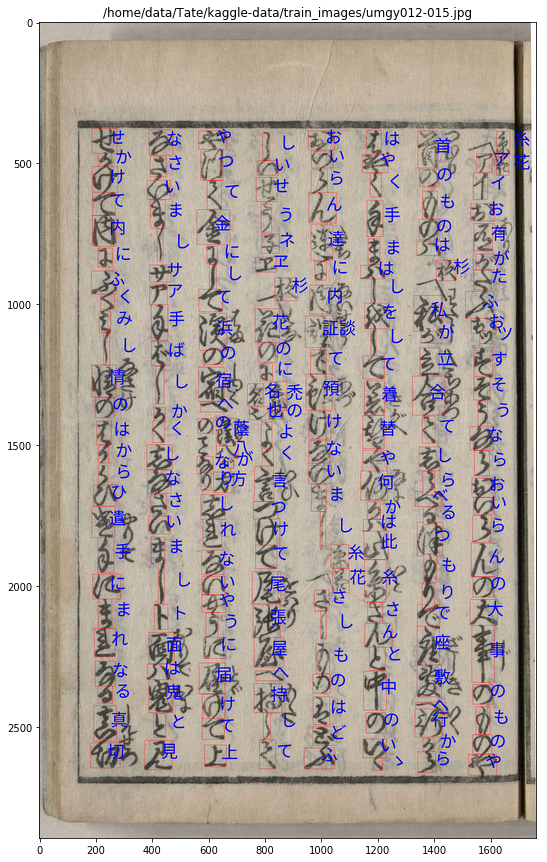

In [14]:
viz = visualize_training_data(input_img, labels_string)
plt.figure(figsize=(15, 15))
plt.title(input_img)
plt.imshow(viz, interpolation='lanczos')
plt.show()

In [15]:
Image.fromarray(viz).save('sample-images/predict_{}'.format(input_img.split('/')[-1]))